# Linear Regression

Import everything that we need for this project.

In [72]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load test and train dataset

In [73]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train-3.csv')
#test.head()

In [74]:
col_names = train.columns.values.tolist()

train = pd.DataFrame(data=train, columns=col_names)
train = train.drop(columns=['SalePrice'])
train.head()

,ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,0,60,RL,81.0,10944,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
1,1,60,RL,102.0,12151,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
2,2,120,FV,40.0,3606,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,New,Partial
3,3,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
4,4,20,RM,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,...,115,0,NaN,NaN,NaN,0,8,2006,COD,Normal


In [75]:
test_col_names = test.columns.values.tolist()

test = pd.DataFrame(data=test, columns=test_col_names)
test.head()

,ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1758,30,RM,50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1,1759,90,RL,NaN,9555,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal
2,1760,70,RL,55.0,10592,Pave,NaN,Reg,Lvl,AllPub,...,53,0,NaN,NaN,NaN,0,8,2007,WD,Normal
3,1761,160,RM,24.0,2760,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal
4,1762,20,FV,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal


## Combine sets before OHE to ensure same number of columns.

In [76]:
train['train']=1
test['train']=0

In [77]:
combined = pd.concat([train, test])
combined.head()

,ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,train
0,0,60,RL,81.0,10944,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,1
1,1,60,RL,102.0,12151,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,1
2,2,120,FV,40.0,3606,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,1
3,3,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,1
4,4,20,RM,60.0,7200,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,COD,Normal,1


## Turn train data frame into one hot encoded form

In [78]:
#combined one hot encoding
combined_cols = combined.columns

num_combined_cols = combined._get_numeric_data().columns

combined_ohe = combined

combined_categorical_columns = list(set(combined_cols) - set(num_combined_cols))

for col in combined_categorical_columns:
    col_ohe = pd.get_dummies(combined[col], prefix=col)
    combined_ohe = pd.concat((combined_ohe, col_ohe), axis=1).drop(col, axis=1)
    
combined_ohe.head()

,ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Central Air_N,Central Air_Y
0,0,60,81.0,10944,7,5,1994,1994,448.0,1000.0,...,0,0,0,1,1,0,0,0,0,1
1,1,60,102.0,12151,9,5,2005,2005,368.0,1249.0,...,0,0,0,1,1,0,0,0,0,1
2,2,120,40.0,3606,7,5,2006,2007,0.0,937.0,...,0,0,0,1,0,0,0,1,0,1
3,3,30,58.0,9098,4,7,1920,2002,0.0,348.0,...,0,0,0,1,1,0,0,0,0,1
4,4,20,60.0,7200,4,5,1950,1950,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [67]:
#old code for just training data
#cols = train.columns

#num_cols = train._get_numeric_data().columns

#num_cols

#list(set(cols) - set(num_cols))

#train_ohe = train

#categorical_columns = list(set(cols) - set(num_cols))

#for col in categorical_columns:
 #   col_ohe = pd.get_dummies(train[col], prefix=col)
  #  train_ohe = pd.concat((train_ohe, col_ohe), axis=1).drop(col, axis=1)
    
#train_ohe.head(10)

## Replace any empty values with mode of the column

In [79]:
#combined dataset
combined_cols = combined_ohe._get_numeric_data().columns
combined_ohe[combined_cols]=combined_ohe[combined_cols].fillna(combined_ohe.mode().iloc[0])
combined_ohe.head()
#combined_ohe.isnull().sum()

,ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Central Air_N,Central Air_Y
0,0,60,81.0,10944,7,5,1994,1994,448.0,1000.0,...,0,0,0,1,1,0,0,0,0,1
1,1,60,102.0,12151,9,5,2005,2005,368.0,1249.0,...,0,0,0,1,1,0,0,0,0,1
2,2,120,40.0,3606,7,5,2006,2007,0.0,937.0,...,0,0,0,1,0,0,0,1,0,1
3,3,30,58.0,9098,4,7,1920,2002,0.0,348.0,...,0,0,0,1,1,0,0,0,0,1
4,4,20,60.0,7200,4,5,1950,1950,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [69]:
#old code for just training data
#cols = train_ohe._get_numeric_data().columns
#train_ohe[cols]=train_ohe[cols].fillna(train_ohe.mode().iloc[0])
#train_ohe.head(10)

## No empty values, time to normalize

In [80]:
from sklearn import preprocessing

combined_cols = combined_ohe.columns

#do minmax normalization
x = combined_ohe.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()#other kinds of normalization possible
x_scaled = min_max_scaler.fit_transform(x)
combined_ohe = pd.DataFrame(x_scaled, columns=combined_cols)

#final_dataset = pd.concat([X_scaled, Y], axis=1, sort=False)
combined_ohe.head()
#final_dataset.isnull().sum()

,ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Central Air_N,Central Air_Y
0,0.000000,0.235294,0.205479,0.045077,0.666667,0.50,0.884058,0.733333,0.28,0.177179,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.000341,0.235294,0.277397,0.050719,0.888889,0.50,0.963768,0.916667,0.23,0.221297,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000683,0.588235,0.065068,0.010778,0.666667,0.50,0.971014,0.950000,0.00,0.166017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.001024,0.058824,0.126712,0.036449,0.333333,0.75,0.347826,0.866667,0.00,0.061658,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.001366,0.000000,0.133562,0.027577,0.333333,0.50,0.565217,0.000000,0.00,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Split back into train and test

In [81]:
train_df = combined_ohe[combined_ohe["train"]==1]
test_df = combined_ohe[combined_ohe["train"]==0]

In [82]:
#remove unwanted features 
train_df = train_df.drop(columns=['train'])
test_df = test_df.drop(columns=['train'])

In [84]:
train_df = train_df.drop(columns=['ID'])
test_df = test_df.drop(columns=['ID'])

In [85]:
train_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Central Air_N,Central Air_Y
0,0.235294,0.205479,0.045077,0.666667,0.50,0.884058,0.733333,0.28,0.177179,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.235294,0.277397,0.050719,0.888889,0.50,0.963768,0.916667,0.23,0.221297,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.588235,0.065068,0.010778,0.666667,0.50,0.971014,0.950000,0.00,0.166017,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.058824,0.126712,0.036449,0.333333,0.75,0.347826,0.866667,0.00,0.061658,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.133562,0.027577,0.333333,0.50,0.565217,0.000000,0.00,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## Split train into features (X) and label (Y)

In [34]:
#create model with training data
train_col_names = train_df.columns

trainX = pd.DataFrame(data=train_df, columns=train_col_names)

train = pd.read_csv('train-3.csv')
trainY = pd.DataFrame(data=train, columns=['SalePrice'])

trainX.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Central Air_N,Central Air_Y
0,0.235294,0.205479,0.045077,0.666667,0.50,0.884058,0.733333,0.28,0.177179,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.235294,0.277397,0.050719,0.888889,0.50,0.963768,0.916667,0.23,0.221297,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.588235,0.065068,0.010778,0.666667,0.50,0.971014,0.950000,0.00,0.166017,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.058824,0.126712,0.036449,0.333333,0.75,0.347826,0.866667,0.00,0.061658,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.133562,0.027577,0.333333,0.50,0.565217,0.000000,0.00,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [49]:
final_dataset = pd.concat([trainX, trainY])

/Users/tylerapplegate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [50]:
final_dataset.head()

,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley_Grvl,Alley_Pave,Bedroom AbvGr,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,...,Street_Pave,TotRms AbvGrd,Total Bsmt SF,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold
0,0.186725,0.437772,0.0,0.0,0.0,0.375,1.0,0.0,0.0,0.0,...,1.0,0.230769,0.200164,1.0,0.0,0.0,0.120084,0.884058,0.733333,0.50
1,0.226843,0.444068,0.0,0.0,0.0,0.375,1.0,0.0,0.0,0.0,...,1.0,0.538462,0.231424,1.0,0.0,0.0,0.134831,0.963768,0.916667,0.50
2,0.213821,0.000000,0.0,0.0,1.0,0.250,0.0,0.0,0.0,0.0,...,1.0,0.230769,0.221277,1.0,0.0,0.0,0.000000,0.971014,0.950000,0.25
3,0.056921,0.000000,0.0,0.0,0.0,0.250,1.0,0.0,0.0,0.0,...,1.0,0.230769,0.086416,1.0,0.0,0.0,0.000000,0.347826,0.866667,0.25
4,0.111321,0.000000,0.0,1.0,0.0,0.250,1.0,0.0,0.0,0.0,...,1.0,0.230769,0.094272,1.0,0.0,0.0,0.000000,0.565217,0.000000,0.00


## No missing values, standardize dataset

In [8]:
#seperate continous from categorical data before normalizing
#ohe_num_cols = train._get_numeric_data().columns

#num_cols

#list(set(cols) - set(num_cols))

In [36]:
#old code from just training data
#from sklearn import preprocessing

#trainX_cols = trainX.columns

#do minmax normalization
#x = X.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()#other kinds of normalization possible
#x_scaled = min_max_scaler.fit_transform(x)
#X_scaled = pd.DataFrame(x_scaled, columns=X_cols)

#final_dataset = pd.concat([X_scaled, Y], axis=1, sort=False)
#final_dataset.head()
#final_dataset.isnull().sum()

# Training our First Linear Regression Model (with only one feature)

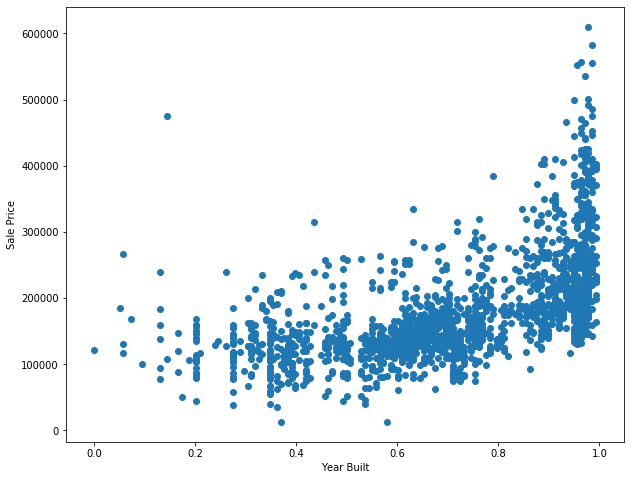

In [39]:
import matplotlib.pyplot as plt

X_1 = trainX['Year Built']
Y_1= trainY['SalePrice']

plt.figure(figsize=(10,8))
plt.scatter(X_1, Y_1)
plt.ylabel('Sale Price')
plt.xlabel('Year Built')
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression

##choose model hyperparams
model = LinearRegression(fit_intercept=True)
print(model)

model.fit(X_1.to_numpy().reshape(-1, 1),Y_1)

print("Learnt model is ==> Sale Price = "+str(model.coef_)+"*Year Built + "+str(model.intercept_))

LinearRegression()
Learnt model is ==> Sale Price = [202360.10882853]*Year Built + 35697.99102939389


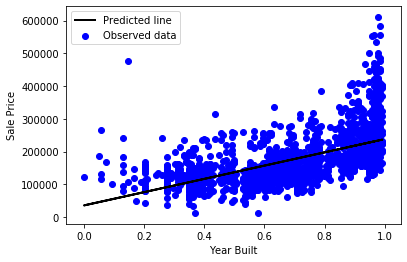

In [41]:
Y_predicted = model.predict(X_1.to_numpy().reshape(-1,1))

plt.plot(X_1, Y_predicted, color='black', linewidth=2)
plt.scatter(X_1, Y_1, color='blue')
plt.legend(['Predicted line', 'Observed data'])
plt.ylabel('Sale Price')
plt.xlabel('Year Built')
plt.show()




## Split training data into train and test

In [140]:
#numcols = pd.DataFrame(data=final_dataset, columns=num_cols)
#numcols = pd.concat([numcols, Y], axis=1, sort=False)
#numcols = numcols.dropna()
#numcols.isnull().sum()
#numcols.head(-5)

In [141]:
#split train into train and test
#from sklearn.model_selection import train_test_split

#training_data, testing_data = train_test_split(numcols, test_size=0.2, shuffle=False)

#print(f"No. of training examples: {training_data.shape[0]}")
#print(f"No. of testing examples: {testing_data.shape[0]}")

In [142]:
#numcols = training_data.columns
#train_x = pd.DataFrame(data=training_data, columns=numcols)
#train_x = train_x.drop(columns=['SalePrice'])
#final_col_names = train_x.columns

#train_y = pd.DataFrame(data=training_data, columns=['SalePrice'])
#print(train_y)
#train_x.head()

In [143]:
#split testing data into test_x and test_y
#test_x = pd.DataFrame(data=testing_data, columns=num_cols)
#test_x = test_x.drop(columns=['SalePrice'])

#test_y = pd.DataFrame(data=testing_data, columns=['SalePrice'])
#print(test_y)
#test_x.head()

## Try polynomial features

In [42]:
from sklearn.preprocessing import PolynomialFeatures

#X = final_dataset.loc[:,final_dataset.columns!='SalePrice']
#Y = final_dataset['SalePrice']

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(trainX)

FeatNames = polynomial_features.get_feature_names(input_features=trainX.columns)

/Users/tylerapplegate/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

PolyModel = LinearRegression()
PolyModel.fit(x_poly, trainY)
y_poly_pred = PolyModel.predict(x_poly)

rmse = np.sqrt(mean_squared_error(trainY,y_poly_pred))
r2 = r2_score(trainY,y_poly_pred)
print("Model RSME is ==> "+str(rmse))
print("Model r2 is ==> "+str(r2))

Y_predicted = PolyModel.predict(x_poly)

trainX['Predictions'] = Y_predicted

MSE = np.square(np.subtract(trainX['SalePrice'], trainX['Predictions'])).mean()

RSME = np.sqrt(MSE)

print("Loss function value achieved: "+str(RSME))
#print(FeatNames)
#print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
trainX.head()

Model RSME is ==> 1.164946857595095e-09
Model r2 is ==> 1.0


KeyError: 'SalePrice'

# Adding All The Features. Linear Regression

In [16]:
X = final_dataset.loc[:,final_dataset.columns!='SalePrice']
Y = final_dataset['SalePrice']

#print(type(X))
#print(type(Y))

from sklearn.linear_model import LinearRegression

##choose model hyperparams
LinearModel = LinearRegression()
#print(model)

LinearModel.fit(X,Y)

#print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))

Y_predicted = LinearModel.predict(X)

final_dataset['Predictions'] = Y_predicted

MSE = np.square(np.subtract(final_dataset['SalePrice'], final_dataset['Predictions'])).mean()

RSME = np.sqrt(MSE)

print("Loss function value achieved: "+str(RSME))

rmse = np.sqrt(mean_squared_error(Y,Y_predicted))
r2 = r2_score(Y,y_poly_pred)
print("Model RSME is ==> "+str(rmse))
print("Model r2 is ==> "+str(r2))

final_dataset.head()

Loss function value achieved: 17990.29976345754
Model RSME is ==> 17990.29976345754
Model r2 is ==> 1.0


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,SalePrice,Predictions
0,0.235294,0.205479,0.058015,0.666667,0.50,0.890511,0.733333,0.347287,0.177179,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,271000,276373.594195
1,0.235294,0.277397,0.065411,0.888889,0.50,0.970803,0.916667,0.285271,0.221297,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,379000,383142.702456
2,0.588235,0.065068,0.013047,0.666667,0.50,0.978102,0.950000,0.000000,0.166017,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194000,218525.755500
3,0.058824,0.126712,0.046702,0.333333,0.75,0.350365,0.866667,0.000000,0.061658,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86000,83666.022703
4,0.000000,0.133562,0.035071,0.333333,0.50,0.569343,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,105000,82938.859873


## The Impact of Regularization
As you can see, not even a single coefficient is close to zero (except for 0.06 and 0.56, which means that our LR model depends significantly on 11 features, which is a complicated model. Complicated models are prone to overfitting on the training dataset.

To prevent overfitting, we in many case, explicitly desire to learn a simpler model. This simpler model may not perform as well on the training dataset, but atleast it will be simple to understand, and it will be able to predict future instances much better (if the overfitting problem goes away).

As discussed in class, two ways to modify (i.e., regularize) Linear Regression to simplify the learnt model: Ridge regression and Lasso. 

Let's start with Ridge Regression.

In [17]:
from sklearn.linear_model import Ridge

#set tradeoff factor to 1.0
RidgeModel = Ridge(alpha=1.0)
#print(model)

RidgeModel.fit(X,Y)

Y_predicted = RidgeModel.predict(X)

final_dataset['Predictions'] = Y_predicted

MSE = np.square(np.subtract(final_dataset['SalePrice'], final_dataset['Predictions'])).mean()

RSME = np.sqrt(MSE)

rmse = np.sqrt(mean_squared_error(Y,Y_predicted))
r2 = r2_score(Y,y_poly_pred)
print("Model RSME is ==> "+str(rmse))
print("Model r2 is ==> "+str(r2))

#LossFunc_Vec = final_dataset['quality'] - final_dataset['Predictions']
#SquaredLossVector = LossFunc_Vec.pow(2)
#LossFunctionValue = np.sum(SquaredLossVector)
#print("MODEL LEARNT BY RIDGE REGRESSION: ")
#print("Learnt model is ==> Coefficients: "+str(RidgeModel.coef_)+" Intercept: "+str(RidgeModel.intercept_))
print("Loss function value achieved: "+str(RSME))
final_dataset.head()

Model RSME is ==> 20549.11493411741
Model r2 is ==> 1.0
Loss function value achieved: 20549.114934117406


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,SalePrice,Predictions
0,0.235294,0.205479,0.058015,0.666667,0.50,0.890511,0.733333,0.347287,0.177179,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,271000,273114.824301
1,0.235294,0.277397,0.065411,0.888889,0.50,0.970803,0.916667,0.285271,0.221297,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,379000,384512.187840
2,0.588235,0.065068,0.013047,0.666667,0.50,0.978102,0.950000,0.000000,0.166017,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194000,220762.825224
3,0.058824,0.126712,0.046702,0.333333,0.75,0.350365,0.866667,0.000000,0.061658,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86000,93326.517406
4,0.000000,0.133562,0.035071,0.333333,0.50,0.569343,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,105000,86634.482775


# Now let's try Lasso. 

In [18]:
from sklearn.linear_model import Lasso

#set tradeoff factor to 0.0
LassoModel = Lasso(alpha=0.0)
#print(model)

LassoModel.fit(X,Y)

Y_predicted = LassoModel.predict(X)

final_dataset['Predictions'] = Y_predicted


MSE = np.square(np.subtract(final_dataset['SalePrice'], final_dataset['Predictions'])).mean()

RSME = np.sqrt(MSE)

rmse = np.sqrt(mean_squared_error(Y,Y_predicted))
r2 = r2_score(Y,y_poly_pred)
print("Model RSME is ==> "+str(rmse))
print("Model r2 is ==> "+str(r2))

#LossFunc_Vec = final_dataset['quality'] - final_dataset['Predictions']
#SquaredLossVector = LossFunc_Vec.pow(2)
#LossFunctionValue = np.sum(SquaredLossVector)
#print("MODEL LEARNT BY RIDGE REGRESSION: ")
#print("Learnt model is ==> Coefficients: "+str(LassoModel.coef_)+" Intercept: "+str(LassoModel.intercept_))
print("Loss function value achieved: "+str(RSME))

final_dataset.head()

/Users/tylerapplegate/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/tylerapplegate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Model RSME is ==> 17990.33067428858
Model r2 is ==> 1.0
Loss function value achieved: 17990.330674288583


/Users/tylerapplegate/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.845e+11, tolerance: 1.077e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,SalePrice,Predictions
0,0.235294,0.205479,0.058015,0.666667,0.50,0.890511,0.733333,0.347287,0.177179,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,271000,276374.203238
1,0.235294,0.277397,0.065411,0.888889,0.50,0.970803,0.916667,0.285271,0.221297,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,379000,383146.908703
2,0.588235,0.065068,0.013047,0.666667,0.50,0.978102,0.950000,0.000000,0.166017,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,194000,218541.205638
3,0.058824,0.126712,0.046702,0.333333,0.75,0.350365,0.866667,0.000000,0.061658,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,86000,83656.095793
4,0.000000,0.133562,0.035071,0.333333,0.50,0.569343,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,105000,82931.795099


## Create predictions for test data

In [51]:
test_col_names = test.columns.values.tolist()

test = pd.DataFrame(data=test, columns=test_col_names)
#print(test_col_names)

In [61]:
test_cols = test.columns

test_num_cols = test._get_numeric_data().columns

test_categorical_columns = list(set(test_cols) - set(test_num_cols))

test_cat = pd.DataFrame(data=test, columns=test_categorical_columns)
test_cat.head()
test_cat.isnull().sum()

Exterior 1st         0
Garage Type         69
Lot Config           0
Exterior 2nd         0
Land Slope           0
Bldg Type            0
Kitchen Qual         0
Lot Shape            0
Central Air          0
Garage Finish       70
Roof Matl            0
Neighborhood         0
Condition 2          0
Street               0
Condition 1          0
Sale Type            0
Mas Vnr Type        13
Sale Condition       0
Fireplace Qu       580
Pool QC           1168
BsmtFin Type 2      37
Misc Feature      1128
Paved Drive          0
Functional           0
Utilities            0
Garage Cond         70
Bsmt Cond           36
MS Zoning            0
BsmtFin Type 1      36
Electrical           1
Exter Cond           0
Exter Qual           0
Fence              945
Alley             1113
Bsmt Qual           36
Garage Qual         70
Bsmt Exposure       37
Foundation           0
Land Contour         0
Heating QC           0
Heating              0
House Style          0
Roof Style           0
dtype: int6

In [62]:
test_cols = test.columns

test_num_cols = test._get_numeric_data().columns

#num_cols

#list(set(cols) - set(num_cols))

test_ohe = test

test_categorical_columns = list(set(test_cols) - set(test_num_cols))

for col in test_categorical_columns:
    test_col_ohe = pd.get_dummies(test[col], prefix=col)
    test_ohe = pd.concat((test_ohe, test_col_ohe), axis=1).drop(col, axis=1)
    
test_ohe.head()
#test_ohe.isnull().sum()

,ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,1758,30,50.0,9000,5,4,1919,1950,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1759,90,NaN,9555,5,6,1979,1979,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,1760,70,55.0,10592,6,7,1923,1996,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,1761,160,24.0,2760,6,5,1973,1973,514.0,0.0,...,0,1,0,0,0,1,0,0,0,0
4,1762,20,85.0,10625,7,5,2006,2007,0.0,1430.0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
test_cols = test_ohe._get_numeric_data().columns
test_ohe[test_cols]=test_ohe[test_cols].fillna(test_ohe.mode().iloc[0])
test_ohe.head()
#test_ohe.isnull().sum()

,ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,1758,30,50.0,9000,5,4,1919,1950,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1759,90,60.0,9555,5,6,1979,1979,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,1760,70,55.0,10592,6,7,1923,1996,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,1761,160,24.0,2760,6,5,1973,1973,514.0,0.0,...,0,1,0,0,0,1,0,0,0,0
4,1762,20,85.0,10625,7,5,2006,2007,0.0,1430.0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
test_col_names = test_ohe.columns

testX = pd.DataFrame(data=test_ohe, columns=test_col_names)
testX = testX.drop(columns=['ID'])

X.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,30,50.0,9000,5,4,1919,1950,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,90,60.0,9555,5,6,1979,1979,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,70,55.0,10592,6,7,1923,1996,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,160,24.0,2760,6,5,1973,1973,514.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
4,20,85.0,10625,7,5,2006,2007,0.0,1430.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
from sklearn import preprocessing

X_test_cols = testX.columns

#do minmax normalization
testx = testX.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()#other kinds of normalization possible
x_test_scaled = min_max_scaler.fit_transform(testx)
X_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test_cols)

#final_test_dataset = pd.concat([X_test_scaled, Y], axis=1, sort=False)
X_test_scaled.head()
#final_dataset.isnull().sum()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed
0,0.058824,0.099315,0.035991,0.444444,0.375,0.325926,0.000000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.411765,0.133562,0.038585,0.444444,0.625,0.770370,0.483333,0.00000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.294118,0.116438,0.043432,0.555556,0.750,0.355556,0.766667,0.00000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.823529,0.010274,0.006824,0.555556,0.500,0.725926,0.383333,0.32125,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,0.219178,0.043586,0.666667,0.500,0.970370,0.950000,0.00000,0.632743,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.preprocessing import PolynomialFeatures

testX = X_test_scaled
#Y = final_dataset['SalePrice']

polynomial_features= PolynomialFeatures(degree=2)
x_test_poly = polynomial_features.fit_transform(testX)

FeatNames = polynomial_features.get_feature_names(input_features=X_test_cols)

/Users/tylerapplegate/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#PolyModel = LinearRegression()
#PolyModel.fit(x_poly, Y)
y_poly_pred = PolyModel.predict(x_test_poly)

#rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
#r2 = r2_score(Y,y_poly_pred)
#print("Model RSME is ==> "+str(rmse))
#print("Model r2 is ==> "+str(r2))

#final_dataset['Predictions'] = Y_predicted

#MSE = np.square(np.subtract(final_dataset['SalePrice'], final_dataset['Predictions'])).mean()

#RSME = np.sqrt(MSE)

#print("Loss function value achieved: "+str(RSME))
#print(FeatNames)
#print("Learnt model is ==> Coefficients: "+str(model.coef_)+" Intercept: "+str(model.intercept_))
y_poly_pred.head()

ValueError: X has 38503 features, but LinearRegression is expecting 45150 features as input.